In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')




In [2]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
import seaborn as sns

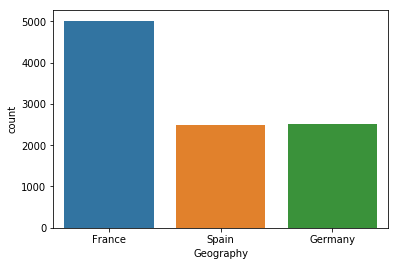

In [4]:
sns.countplot(dataset['Geography'])

In [7]:
#france has a disproportional amount of samples, let's drop half the France data
df_class_0 = dataset[dataset['Geography'] == "France"]


In [8]:
df_class_0 = df_class_0.sample(dataset[dataset['Geography'] == "Spain"].count()[0])


In [9]:
dataset = dataset[dataset['Geography'] != "France"]

In [10]:
frames = [dataset, df_class_0]

dataset = pd.concat(frames)

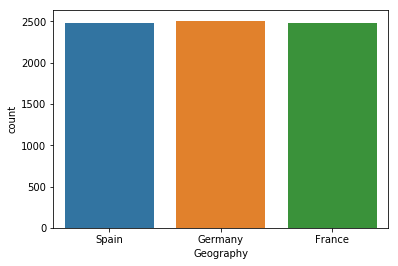

In [11]:
sns.countplot(dataset['Geography'])

In [12]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

In [14]:

labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

In [15]:
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()

In [16]:
X = X[:,1:]

In [17]:
X

array([[0.0000000e+00, 1.0000000e+00, 6.0800000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [0.0000000e+00, 1.0000000e+00, 8.5000000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 7.9084100e+04],
       [0.0000000e+00, 1.0000000e+00, 6.4500000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.4975671e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 6.7900000e+02, ..., 0.0000000e+00,
        0.0000000e+00, 6.9608480e+04],
       [0.0000000e+00, 0.0000000e+00, 7.4900000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 4.7911030e+04],
       [0.0000000e+00, 0.0000000e+00, 7.3900000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.9155710e+05]])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)


In [19]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
import keras


Using TensorFlow backend.


In [21]:
from keras.models import Sequential
from keras.layers import Dense

In [22]:
classifier = Sequential()

In [23]:
classifier.add(Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform"))

In [24]:
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

In [25]:
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

In [26]:
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

In [27]:
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

In [28]:
## use softmax activation if there are more than two classes


In [29]:
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

In [30]:
## category cross entropy loss for more than two classes

In [31]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [56]:
classifier.fit(x=X_train,y=y_train,batch_size=20,epochs=100)

Epoch 1/100
5970/5970 [==============================] - 3s 500us/step - loss: 0.5658 - acc: 0.7797
Epoch 2/100
5970/5970 [==============================] - 1s 153us/step - loss: 0.4508 - acc: 0.7819
Epoch 3/100
5970/5970 [==============================] - 1s 138us/step - loss: 0.4438 - acc: 0.7819
Epoch 4/100
5970/5970 [==============================] - 1s 138us/step - loss: 0.4397 - acc: 0.7819
Epoch 5/100
5970/5970 [==============================] - 1s 139us/step - loss: 0.4362 - acc: 0.7819
Epoch 6/100
5970/5970 [==============================] - 1s 137us/step - loss: 0.4338 - acc: 0.8037
Epoch 7/100
5970/5970 [==============================] - 1s 141us/step - loss: 0.4318 - acc: 0.8127
Epoch 8/100
5970/5970 [==============================] - 1s 143us/step - loss: 0.4300 - acc: 0.8141
Epoch 9/100
5970/5970 [==============================] - 1s 144us/step - loss: 0.4290 - acc: 0.8181
Epoch 10/100
5970/5970 [==============================] - 1s 173us/step - loss: 0.4275 - acc: 0.8204

Epoch 82/100
5970/5970 [==============================] - 1s 141us/step - loss: 0.4124 - acc: 0.8281
Epoch 83/100
5970/5970 [==============================] - 1s 137us/step - loss: 0.4124 - acc: 0.8276
Epoch 84/100
5970/5970 [==============================] - 1s 144us/step - loss: 0.4125 - acc: 0.8295
Epoch 85/100
5970/5970 [==============================] - 1s 135us/step - loss: 0.4123 - acc: 0.8296
Epoch 86/100
5970/5970 [==============================] - 1s 140us/step - loss: 0.4125 - acc: 0.8300
Epoch 87/100
5970/5970 [==============================] - 1s 137us/step - loss: 0.4122 - acc: 0.8296
Epoch 88/100
5970/5970 [==============================] - 1s 135us/step - loss: 0.4123 - acc: 0.8307
Epoch 89/100
5970/5970 [==============================] - 1s 135us/step - loss: 0.4125 - acc: 0.8295
Epoch 90/100
5970/5970 [==============================] - 1s 137us/step - loss: 0.4124 - acc: 0.8276
Epoch 91/100
5970/5970 [==============================] - 1s 133us/step - loss: 0.4123 - ac

In [40]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout

In [34]:
from sklearn.model_selection import cross_val_score

In [52]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform"))
    Dropout(0.1, noise_shape=None, seed=None)
    classifier.add(Dense(activation="relu", units=7, kernel_initializer="uniform"))
#     Dropout(0.1, noise_shape=None, seed=None)
#     classifier.add(Dense(activation="relu", units=7, kernel_initializer="uniform"))
#     Dropout(0.1, noise_shape=None, seed=None)
#     classifier.add(Dense(activation="relu", units=7, kernel_initializer="uniform"))
#     Dropout(0.1, noise_shape=None, seed=None)
#     classifier.add(Dense(activation="relu", units=7, kernel_initializer="uniform"))
    classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))
    classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    return classifier

In [53]:
classifier = KerasClassifier(build_fn = build_classifier,batch_size=10,nb_epoch = 200)

In [54]:
accuracies = cross_val_score(estimator = classifier,X = X_train,y = y_train,cv=10,n_jobs = 1)

Epoch 1/1
597/597 [==============================] - 1s 1ms/step
Epoch 1/1
597/597 [==============================] - 1s 1ms/step
Epoch 1/1
597/597 [==============================] - 1s 2ms/step
Epoch 1/1
597/597 [==============================] - 1s 2ms/step
Epoch 1/1
597/597 [==============================] - 1s 2ms/step
Epoch 1/1
597/597 [==============================] - 1s 2ms/step
Epoch 1/1
597/597 [==============================] - 1s 2ms/step
Epoch 1/1
597/597 [==============================] - 1s 2ms/step
Epoch 1/1
597/597 [==============================] - 1s 2ms/step
Epoch 1/1
597/597 [==============================] - 1s 2ms/step


In [51]:
accuracies.mean()*100


78.1909546076353

In [58]:
pred = classifier.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [60]:
print(confusion_matrix(y_test,pred))

[[1135   44]
 [ 202  112]]


In [62]:
print(accuracy_score(y_test,pred))

0.8352310783657066
